In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import csv
from sklearn import cluster
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

/Users/geraintianpalmer/Documents/DetectingDeadlockInQingNetworkSimulation/venv/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
bound_data = []
file_name = 'data_for_graphs/ratio_bound_data.csv'
data_file = open(file_name, 'r')
rdr = csv.reader(data_file)
for row in rdr:
    bound_data.append([float(obs) for obs in row])

In [4]:
r_boundaries = [0.0, 0.25, 0.5, 0.75, 1.0]
ratios_inverse_rs = [[1.0/row[-1] for row in bound_data if min(row[7], row[8]) > r_boundaries[i] and min(row[7], row[8]) <= r_boundaries[i+1]] for i in range(4)]

In [5]:
print len(ratios_inverse_rs)
print [len(row) for row in ratios_inverse_rs]
print sum([len(row) for row in ratios_inverse_rs])

4
[4608000, 1944000, 576000, 72000]
7200000


In [6]:
meansv = [sum(row)/len(row) for row in ratios_inverse_rs]
means = [str(round(m, 4)) for m in meansv]

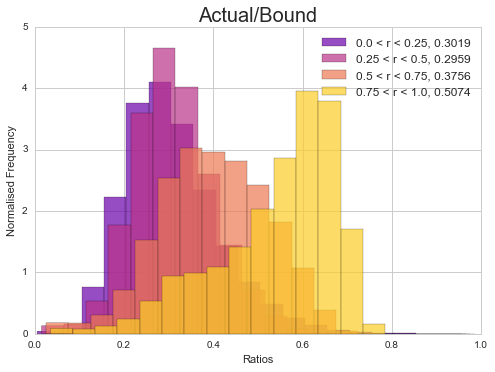

In [9]:
bins = [i/20.0 for i in range(20)]
width = 1.0/20.0
colormap = plt.cm.plasma
fig, ax = plt.subplots()
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0.2, 0.9, len(ratios_inverse_rs))])
plt.hist(ratios_inverse_rs, bins=bins, width=width, alpha=0.7, stacked=False, label=['0.0 < r < 0.25, ' + str(means[0]), '0.25 < r < 0.5, ' + str(means[1]), '0.5 < r < 0.75, ' + str(means[2]), '0.75 < r < 1.0, ' + str(means[3])], normed=True)
plt.xlabel('Ratios')
plt.ylabel('Normalised Frequency')
plt.legend(fontsize=12)
ax.set_title('Actual/Bound', fontsize=20)
plt.show()